<h2 style='color:green' align="center">Logistic Regression: Multiclass Classification</h2>

We will see how to use logistic regression for multiclass classification. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

### Dataset Description

This is a copy of the test set of the UCI ML hand-written digits datasets

https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

More details on: https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [2]:
digits = load_digits()

(1797, 64)


<Figure size 432x288 with 0 Axes>

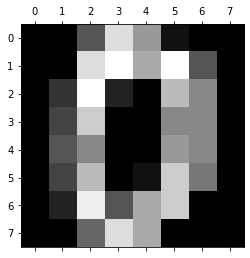

In [3]:
# Examples

# To load the data and visualize the images::

from sklearn.datasets import load_digits
digits = load_digits()

print(digits.data.shape)

import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

<Figure size 432x288 with 0 Axes>

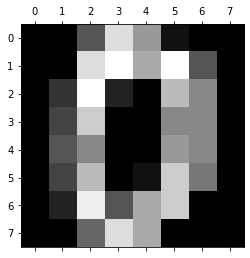

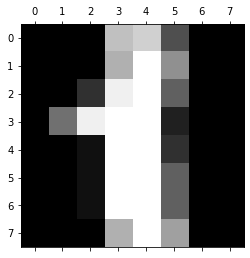

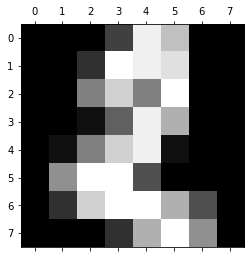

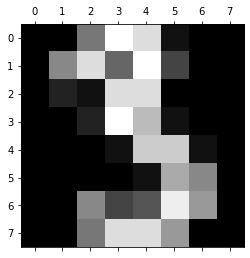

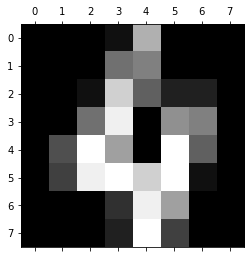

In [4]:
# Print the first 5 samples
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
# # the data is stored in the form of a dictionaries
# # here the above values are the keys to the dictionaries
#     # and it has different values in it, which are its values.
# load_digits()

```
Load and return the digits dataset (classification).

Each datapoint is a 8x8 image of a digit.

=================   ==============
Classes                         10
Samples per class             ~180
Samples total                 1797
Dimensionality                  64
Features             integers 0-16
=================   ==============
```

data : :class:`~sklearn.utils.Bunch`
    
    Dictionary-like object, with the following attributes.

    data : {ndarray, dataframe} of shape (1797, 64)
        The flattened data matrix. If `as_frame=True`, `data` will be
        a pandas DataFrame.
    target: {ndarray, Series} of shape (1797,)
        The classification target. If `as_frame=True`, `target` will be
        a pandas Series.
    feature_names: list
        The names of the dataset columns.
    target_names: list
        The names of target classes.

        .. versionadded:: 0.20

    frame: DataFrame of shape (1797, 65)
        Only present when `as_frame=True`. DataFrame with `data` and
        `target`.

        .. versionadded:: 0.23
    images: {ndarray} of shape (1797, 8, 8)
        The raw image data.
    DESCR: str
        The full description of the dataset.

(data, target) : tuple if ``return_X_y`` is True

    .. versionadded:: 0.18


```
DESCR: str
    The full description of the dataset.
    ```

In [7]:
# digits.DESCR 

```
data : {ndarray, dataframe} of shape (1797, 64)
    The flattened data matrix. If `as_frame=True`, `data` will be
    a pandas DataFrame.
    ```

In [8]:
# digits.data

```
feature_names: list
    The names of the dataset columns.
    ```

In [9]:
# digits.feature_names

```
frame: DataFrame of shape (1797, 65)
    Only present when `as_frame=True`. DataFrame with `data` and
    `target`.
    ```

In [10]:
# digits.frame

```
images: {ndarray} of shape (1797, 8, 8)
    The raw image data.
    ```

In [11]:
# digits.images

```
target: {ndarray, Series} of shape (1797,)
    The classification target. If `as_frame=True`, `target` will be
    a pandas Series.
    ```

In [12]:
# digits.target

```
target_names: list
    The names of target classes.
    ```

In [13]:
# digits.target_names

#### Plotting the data to see the images and the target variables

In [14]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

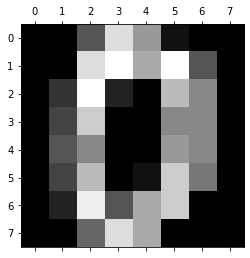

In [15]:
plt.gray()
plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

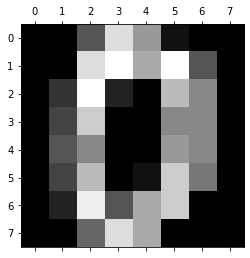

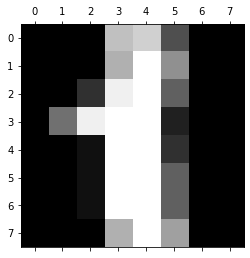

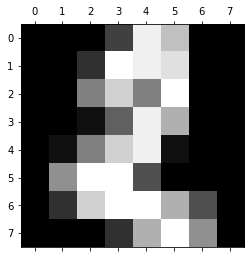

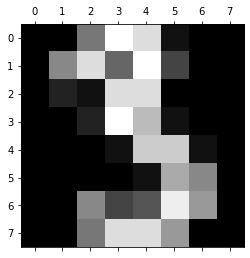

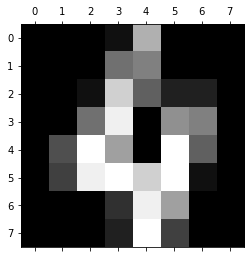

In [16]:
# Print the first 5 samples
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [17]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

### Create and train logistic regression model

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [21]:
len(X_train)

1437

In [22]:
len(X_test)

360

In [23]:
X_train

array([[ 0.,  0.,  3., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 15.,  9.,  0.],
       [ 0.,  2., 11., ..., 16., 16.,  1.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 14., ...,  5.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.]])

In [24]:
X_test

array([[ 0.,  0.,  1., ..., 15.,  6.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  5., ...,  7.,  0.,  0.],
       [ 0.,  0.,  4., ...,  7.,  0.,  0.]])

In [25]:
model.fit(X_train, y_train)

C:\Users\Mehta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model.score(X_test, y_test)

0.9583333333333334

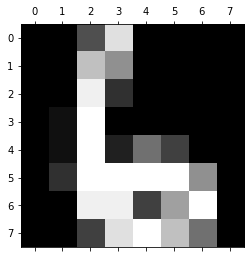

In [27]:
plt.matshow(digits.images[67])

In [28]:
digits.target[67]

6

In [29]:
model.predict(digits.data[[67]])

array([6])

In [30]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

### Confusion Matrix

In [31]:
y_predicted = model.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[32,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 37,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 33,  0,  0,  1,  1,  1],
       [ 0,  0,  1,  0,  0, 42,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 31,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36]], dtype=int64)

Text(69.0, 0.5, 'Truth')

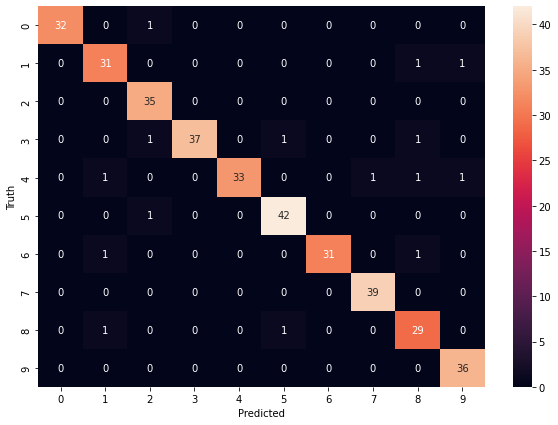

In [34]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True) # annot=True, is used to give the numbers in your heatmap
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Exercise**

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy 
of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width 
3. Petal Length 
4. Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1. Setosa
2. Versicolour
3. Virginica

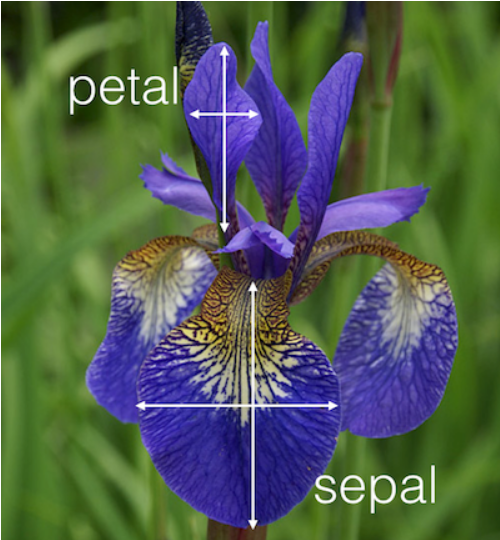